In [1]:
import sys
import warnings
sys.path.append('../src/')
warnings.filterwarnings("ignore")

from server import Server
from utils import plot_exp

### First experiment : impact of federated learning

In [2]:
lr = 0.01
epochs = 100
nr_training_rounds = 100
batch_size = 8
range_nr_clients = [1,5,10]

In [3]:
experiment_losses, experiment_accs = [], []
for nr_clients in range_nr_clients:
    print(f"### Number of clients : {nr_clients} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=nr_training_rounds,
        lr=lr,
        epochs=epochs,
        data='MED',
        batch_size=batch_size,
        max_grad_norm=1.2,
        epsilon=0,
        n_accumulation_steps=0,
        epsilon_training_iteration=0,
        is_private=False,
        is_parallel=True,
        device=None,
        verbose='none')
    test_losses, test_accs = server(early=True,patience=8)
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)

### Number of clients : 1 ###


--- Configuration ---
nr_clients: 1
nr_training_rounds: 100
lr: 0.01
epochs: 100
data: MED
batch_size: 8
max_grad_norm: 1.2
epsilon: 0
n_accumulation_steps: 0
epsilon_training_iteration: 0
is_parallel: True
is_private: False
device: <class 'torch.device'>
verbose: none
--- Training ---


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "../src/client.py", line 83, in train
    for i, (images, labels) in enumerate(self.train_loader):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 517, in __next__
    data = self._next_data()
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 557, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch

EarlyStopping counter: 1 out of 8
EarlyStopping counter: 1 out of 8
EarlyStopping counter: 2 out of 8
EarlyStopping counter: 1 out of 8
EarlyStopping counter: 2 out of 8
EarlyStopping counter: 3 out of 8


Exception in thread Thread-17:
Traceback (most recent call last):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "../src/client.py", line 83, in train
    for i, (images, labels) in enumerate(self.train_loader):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 517, in __next__
    data = self._next_data()
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 557, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torc

EarlyStopping counter: 4 out of 8
EarlyStopping counter: 5 out of 8
EarlyStopping counter: 1 out of 8
EarlyStopping counter: 2 out of 8
EarlyStopping counter: 3 out of 8
EarlyStopping counter: 4 out of 8
EarlyStopping counter: 5 out of 8
EarlyStopping counter: 6 out of 8
EarlyStopping counter: 7 out of 8
EarlyStopping counter: 8 out of 8
Early stopping
Test losses: [1.0199, 0.6177, 0.5354, 0.4726, 0.3608, 0.3258, 0.2839, 0.4041, 0.2501, 0.2013, 0.3169, 0.1811, 0.264, 0.1932, 0.1975, 0.1438, 0.1831, 0.1409, 0.1305, 0.1249, 0.1125, 0.1033, 0.1043, 0.0971]
Test accuracies: [0.7916666666666666, 0.9583333333333334, 0.9166666666666666, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Finished
### Number of clients : 5 ###


--- Configuration ---
nr_clients: 5
nr_training_rounds: 100
lr: 0.01
epochs: 100
data: MED
batch_size: 8
max_grad_norm: 1.2
epsilon: 0
n_accumulation_steps: 0
epsilon_training_iteration: 0
is_parallel:

Exception in thread Thread-159:
Traceback (most recent call last):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "../src/client.py", line 83, in train
    for i, (images, labels) in enumerate(self.train_loader):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 517, in __next__
    data = self._next_data()
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 557, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/tor

EarlyStopping counter: 1 out of 8
EarlyStopping counter: 2 out of 8
EarlyStopping counter: 3 out of 8
EarlyStopping counter: 4 out of 8
EarlyStopping counter: 5 out of 8
EarlyStopping counter: 6 out of 8
EarlyStopping counter: 7 out of 8
EarlyStopping counter: 8 out of 8
Early stopping
Test losses: [1.7373, 2.6896, 3.0858, 1.0569, 1.193, 0.817, 1.7167, 1.1516, 0.6013, 0.7569, 0.6347, 0.4873, 0.4565, 0.4738, 0.6343, 0.3943, 0.3724, 0.3743, 0.3511, 0.3279, 0.3189, 0.3092, 0.326, 0.2924, 0.3514, 0.3119, 0.2594, 0.2521, 0.255, 0.2443, 0.233, 0.2609, 0.2269, 0.2229, 0.2158]
Test accuracies: [0.9166666666666666, 0.4583333333333333, 0.4583333333333333, 0.9166666666666666, 0.8333333333333334, 1.0, 0.5416666666666666, 0.8333333333333334, 1.0, 0.9166666666666666, 1.0, 1.0, 1.0, 0.9166666666666666, 0.9166666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Finished
### Number of clients : 10 ###


--- Configuration ---
nr_clients: 10
nr

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100

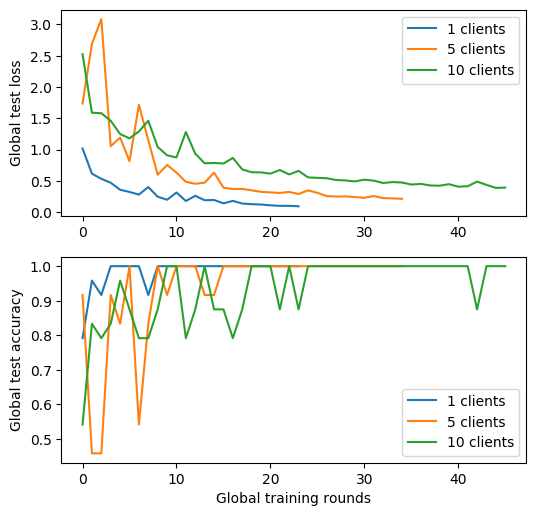

In [5]:
names = [f'{i} clients' for i in range_nr_clients]
plot_exp(experiment_losses, experiment_accs, names)

### Second experiment : impact of differential privacy

In [ ]:
lr = 0.01
epochs = 100
nr_training_rounds = 100
batch_size = 10
nr_clients = 10
range_epsilon = [0.001,0.01,0.1]

In [ ]:
experiment_losses, experiment_accs = [], []
for epsilon in range_epsilon:
    print(f"### epsilon : {epsilon} ###\n\n")
    server = Server(
        nr_clients=nr_clients,
        nr_training_rounds=nr_training_rounds,
        lr=lr,
        epochs=epochs,
        data='MED',
        batch_size=batch_size,
        max_grad_norm=1.2,
        epsilon=epsilon,
        n_accumulation_steps=0.5,
        epsilon_training_iteration=0.05,
        is_private=True,
        is_parallel=True,
        device=None,
        verbose='server')
    test_losses, test_accs = server(early=True,patience=10)
    experiment_losses.append(test_losses)
    experiment_accs.append(test_accs)